<a href="https://colab.research.google.com/github/leopauly/Flow-PINN/blob/main/Src/Flow_DNN_PINN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Description

In [1]:
print('Name:Leo pauly')
print('Description: Program for implementing Flow-DNN with unseen cases')
import random
random.seed(10)

Name:Leo pauly
Description: Program for implementing Flow-DNN with unseen cases


For reference, PINN & SciANN package tutorial: https://www.youtube.com/watch?v=20NEQFcdp3o&ab_channel=DesignSafe-CIMedia

#### **Install**

This will install SciANN library and all the dependecies

In [2]:
#!pip install sciann

#### **Import**

In [3]:
import random
random.seed(10)
import numpy as np
np.random.seed(64)
import matplotlib.pyplot as plt 
import sciann as sn 
import pandas as pd
from numpy import pi
from math import log10
from sciann.utils.math import diff, sign, sin
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
np.set_printoptions(suppress=True)
import time
import tensorflow as tf
tf.random.set_seed(512)

---------------------- SCIANN 0.6.5.0 ---------------------- 
For details, check out our review paper and the documentation at: 
 +  "https://www.sciencedirect.com/science/article/pii/S0045782520307374", 
 +  "https://arxiv.org/abs/2005.08803", 
 +  "https://www.sciann.com". 

 Need support or would like to contribute, please join sciann`s slack group: 
 +  "https://join.slack.com/t/sciann/shared_invite/zt-ne1f5jlx-k_dY8RGo3ZreDXwz0f~CeA" 
 
TensorFlow Version: 2.5.1 
Python Version: 3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0] 



Run the following only if using google Colab. It will ennable you to load data from google drive. Ignore if running on you local machine. 

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')
base_dir='/content/gdrive/MyDrive/Research Fellow | AROP/Flow-PINN-main/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Switching between DNN and PINN implementations

In [5]:
print('Switch options: \n 1-DNN \n 2-PINN')
switch=1

Switch options: 
 1-DNN 
 2-PINN


#### **Flow-PINN** 

Details of defining functionls is available here: https://www.sciann.com/getting-started/functional-guide/

Details of deifing the model can be found here: https://www.sciann.com/scimodels/#scimodel



In [6]:
x = sn.Variable('x',dtype='float64')
y = sn.Variable('y',dtype='float64')
v = sn.Variable('v',dtype='float64')
K = sn.Variable('K',dtype='float64')
h = sn.Functional('h', [x,y,v,K], [10], 'relu')

In [7]:

if (switch==1):
  print('DNN loss def')
  d1 = sn.Data(h)
elif(switch==2):
  print('PINN loss def')
  d1 = sn.Data(h)
  pde1=pow(diff(h, x),2)
  pde2=pow(diff(h, y),2)
  pde3=pow(pde1+pde2,.5)
  C1 = -v-((K)*pde3)
else: 
  print('Invlaid switch') 
  

DNN loss def


####  **Model definition**

In [8]:
if (switch==1):
  print('DNN model implemented')
  m = sn.SciModel([x,y,v,K], [d1],loss_func='mse',optimizer='adam')
elif(switch==2):
  print('PINN model implemented')
  m = sn.SciModel([x,y,v,K], [d1,C1],loss_func='mse',optimizer='adam')
else: 
  print('Invlaid switch') 

DNN model implemented


#### **Dataset**

Datasets in .xlxs format are loaded using pandas python library: https://pandas.pydata.org/

In [9]:
v_data_df_1=pd.read_excel(base_dir+'Data/1Well_DarcyFlux.xlsx')
h_data_df_1=pd.read_excel(base_dir+'/Data/1Well_HydraulicHead.xlsx')#('/content/gdrive/My Drive/Colab Notebooks/PINN/Hydraulic_Head.xlsx')  

In [10]:
v_data_df_2=pd.read_excel(base_dir+'Data/2Wells_DarcyFlux.xlsx')#('/content/gdrive/My Drive/Colab Notebooks/PINN/Darcy_Flux.xlsx')  
h_data_df_2=pd.read_excel(base_dir+'Data/2Wells_HydraulicHead.xlsx')#('/content/gdrive/My Drive/Colab Notebooks/PINN/Hydraulic_Head.xlsx')  

In [11]:
v_data_df_3=pd.read_excel(base_dir+'Data/Dam_DarcyFlux.xlsx')#('/content/gdrive/My Drive/Colab Notebooks/PINN/Darcy_Flux.xlsx')  
h_data_df_3=pd.read_excel(base_dir+'Data/Dam_HydraulicHead.xlsx')#('/content/gdrive/My Drive/Colab Notebooks/PINN/Hydraulic_Head.xlsx')  

In [12]:
v_data_df_4=pd.read_excel(base_dir+'Data/Pit_DarcyFlux.xlsx')#('/content/gdrive/My Drive/Colab Notebooks/PINN/Darcy_Flux.xlsx')  
h_data_df_4=pd.read_excel(base_dir+'Data/Pit_HydraulicHead.xlsx')#('/content/gdrive/My Drive/Colab Notebooks/PINN/Hydraulic_Head.xlsx')  

In [13]:
v_data_df_test=pd.read_excel(base_dir+'Data/PitWithWell_DarcyFlux.xlsx')#('/content/gdrive/My Drive/Colab Notebooks/PINN/Darcy_Flux.xlsx')  
h_data_df_test=pd.read_excel(base_dir+'Data/PitWithWell_HydraulicHead.xlsx')#('/content/gdrive/My Drive/Colab Notebooks/PINN/Hydraulic_Head.xlsx')  

In [14]:
x1_data_1=np.array(v_data_df_1['X'].values)
x2_data_1=np.array(v_data_df_1['Y'].values)

v_data_1=np.array(v_data_df_1['VINIT'].values)
print('v_data_1:',v_data_1.shape)

h_data_1=np.array(h_data_df_1['FINIT'].values)
print('h_data_1:',h_data_1.shape)

v_data_1: (9587,)
h_data_1: (9587,)


In [15]:
x1_data_2=np.array(v_data_df_2['X'].values)
x2_data_2=np.array(v_data_df_2['Y'].values)

v_data_2=np.array(v_data_df_2['VINIT'].values)
print('v_data_2:',v_data_2.shape)

h_data_2=np.array(h_data_df_2['FINIT'].values)
print('h_data_2:',h_data_2.shape)

v_data_2: (7919,)
h_data_2: (7919,)


In [16]:
x1_data_3=np.array(v_data_df_3['X'].values)
x2_data_3=np.array(v_data_df_3['Y'].values)

v_data_3=np.array(v_data_df_3['VINIT'].values)
print('v_data_3:',v_data_3.shape)

h_data_3=np.array(h_data_df_3['FINIT'].values)
print('h_data_3:',h_data_3.shape)

v_data_3: (4020,)
h_data_3: (4020,)


In [17]:
x1_data_4=np.array(v_data_df_4['X'].values)
x2_data_4=np.array(v_data_df_4['Y'].values)

v_data_4=np.array(v_data_df_4['VINIT'].values)
print('v_data_4:',v_data_4.shape)

h_data_4=np.array(h_data_df_4['FINIT'].values)
print('h_data_4:',h_data_4.shape)

v_data_4: (7929,)
h_data_4: (7929,)


In [18]:
x1_data_test=np.array(v_data_df_test['X'].values)
x2_data_test=np.array(v_data_df_test['Y'].values)

v_data_test=np.array(v_data_df_test['VINIT'].values)
print('v_data_test:',v_data_test.shape)

h_data_test=np.array(h_data_df_test['FINIT'].values)
print('h_data_test:',h_data_test.shape)

v_data_test: (7899,)
h_data_test: (7899,)


**Visualizing data**

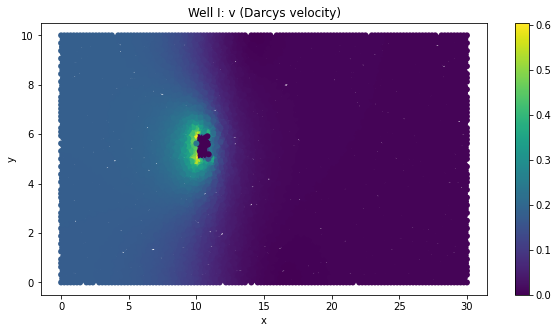

In [19]:
fig = plt.figure(figsize=(10, 5))
plt.scatter(x1_data_1, x2_data_1, c=v_data_1, cmap='viridis',linewidths=.0001)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Well I: v (Darcys velocity)')
plt.colorbar()
plt.show()

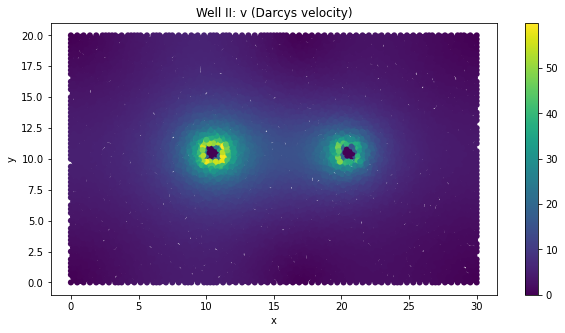

In [20]:
fig = plt.figure(figsize=(10, 5))
plt.scatter(x1_data_2, x2_data_2, c=v_data_2, cmap='viridis',linewidths=.0001)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Well II: v (Darcys velocity)')
plt.colorbar()
plt.show()

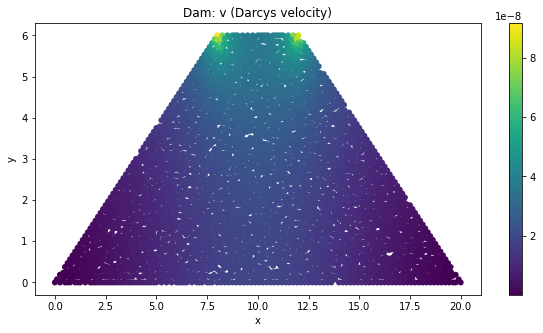

In [21]:
fig = plt.figure(figsize=(10, 5))
plt.scatter(x1_data_3, x2_data_3, c=v_data_3, cmap='viridis',linewidths=.0001)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dam: v (Darcys velocity)')
plt.colorbar()
plt.show()

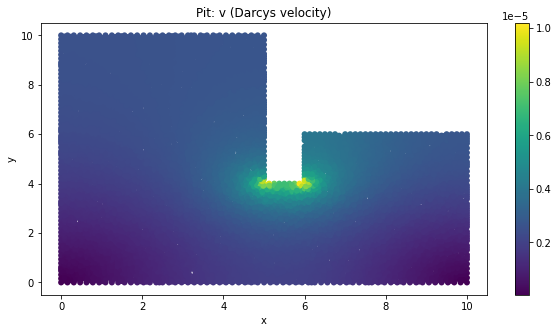

In [22]:
fig = plt.figure(figsize=(10, 5))
plt.scatter(x1_data_4, x2_data_4, c=v_data_4, cmap='viridis',linewidths=.0001)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Pit: v (Darcys velocity)')
plt.colorbar()
plt.show()

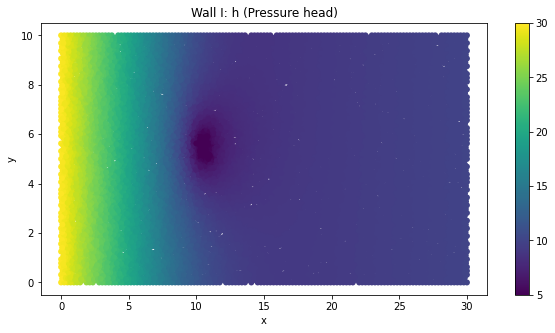

In [23]:
fig = plt.figure(figsize=(10, 5))
plt.scatter(x1_data_1, x2_data_1, c=h_data_1, cmap='viridis',linewidths=.0001)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Wall I: h (Pressure head)')
plt.colorbar()
plt.show()

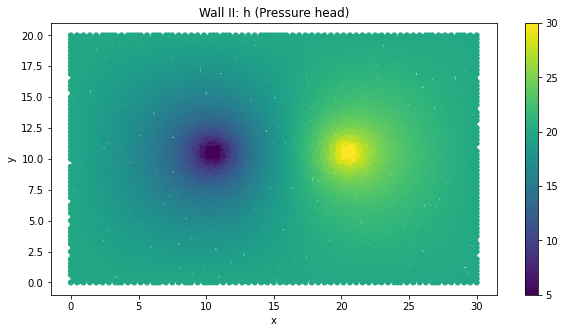

In [24]:
fig = plt.figure(figsize=(10, 5))
plt.scatter(x1_data_2, x2_data_2, c=h_data_2, cmap='viridis',linewidths=.0001)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Wall II: h (Pressure head)')
plt.colorbar()
plt.show()

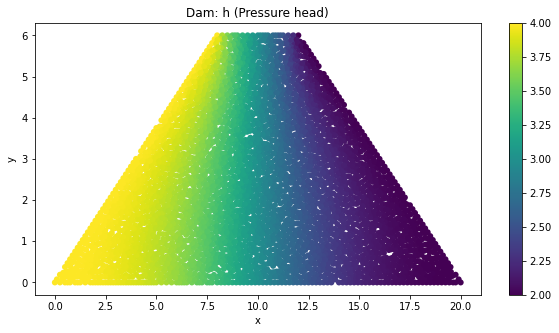

In [25]:
fig = plt.figure(figsize=(10, 5))
plt.scatter(x1_data_3, x2_data_3, c=h_data_3, cmap='viridis',linewidths=.0001)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dam: h (Pressure head)')
plt.colorbar()
plt.show()

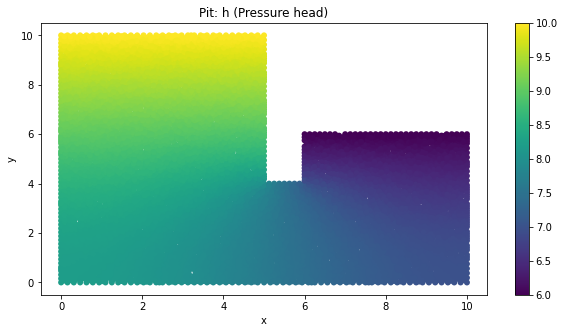

In [26]:
fig = plt.figure(figsize=(10, 5))
plt.scatter(x1_data_4, x2_data_4, c=h_data_4, cmap='viridis',linewidths=.0001)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Pit: h (Pressure head)')
plt.colorbar()
plt.show()

#### Data: Preprocessing

In [27]:
x1_data_1=np.reshape(x1_data_1,(-1))
x1_data_2=np.reshape(x1_data_2,(-1))
x1_data_3=np.reshape(x1_data_3,(-1))
x1_data_4=np.reshape(x1_data_4,(-1))

x2_data_1=np.reshape(x2_data_1,(-1))
x2_data_2=np.reshape(x2_data_2,(-1))
x2_data_3=np.reshape(x2_data_3,(-1))
x2_data_4=np.reshape(x2_data_4,(-1))

v_data_1=np.reshape(v_data_1,(-1))
v_data_2=np.reshape(v_data_2,(-1))
v_data_3=np.reshape(v_data_3,(-1))
v_data_4=np.reshape(v_data_4,(-1))

h_data_1=np.reshape(h_data_1,(-1))
h_data_2=np.reshape(h_data_2,(-1))
h_data_3=np.reshape(h_data_3,(-1))
h_data_4=np.reshape(h_data_4,(-1))

In [28]:
x1_data=np.concatenate([x1_data_1,x1_data_2,x1_data_3,x1_data_4])
x2_data=np.concatenate([x2_data_1,x2_data_2,x2_data_3,x2_data_4])

x1_data=np.concatenate([x1_data_1,x1_data_2,x1_data_3,x1_data_4])
x2_data=np.concatenate([x2_data_1,x2_data_2,x2_data_3,x2_data_4])

v_data=np.concatenate([v_data_1,v_data_2,v_data_3,v_data_4])
h_data=np.concatenate([h_data_1,h_data_2,h_data_3,h_data_4])

K_data_1=np.ones(x1_data_1.shape[0])*(86400*(1e-6))
K_data_2=np.ones(x1_data_2.shape[0])*(86400*(1e-4))
K_data_3=np.ones(x1_data_3.shape[0])*(86400*(1e-7))
K_data_4=np.ones(x1_data_4.shape[0])*(86400*(1e-5))
K_data=np.concatenate((K_data_1,K_data_2,K_data_3,K_data_4))

print(x1_data.shape,x2_data.shape,v_data.shape,h_data.shape,K_data.shape)

(29455,) (29455,) (29455,) (29455,) (29455,)


In [29]:
train_test_ratio=.8
x1_train, x1_test,x2_train, x2_test, v_train, v_test,h_train, h_test, K_train, K_test = train_test_split(x1_data,x2_data, v_data,h_data, K_data, train_size=train_test_ratio,shuffle=True, random_state=512)
C1_train=np.zeros(x1_train.shape)
C1_test=np.zeros(x1_test.shape)
print('test:train ratio:',train_test_ratio)
print('Training sizes(x1,x2,v,h,K,C):',x1_train.shape,x2_train.shape,v_train.shape,h_train.shape,K_train.shape,C1_train.shape)
print('Testing sizes(x1,x2,v,h,K,C):',x1_test.shape,x2_test.shape,v_test.shape,h_test.shape,K_test.shape,C1_test.shape)

test:train ratio: 0.8
Training sizes(x1,x2,v,h,K,C): (23564,) (23564,) (23564,) (23564,) (23564,) (23564,)
Testing sizes(x1,x2,v,h,K,C): (5891,) (5891,) (5891,) (5891,) (5891,) (5891,)


In [30]:
h_pred = h.eval(m, [x1_test,x2_test,v_test,K_test])
print('MSE for h before training:',(mean_squared_error(h_test,h_pred)))

MSE for h before training: 124.87385504789609


#### **Training**

Details of the model.train function can be found here: https://www.sciann.com/scimodels/#train

In [31]:
learning_rate=0.001
epochs=100
batch_size=64
verbose=0
print('================ Training: Start ================')
start = time.process_time()

if (switch==1):
  print('DNN training ! \n')
  history = m.train([x1_train,x2_train,v_train,K_train], [h_train], learning_rate=learning_rate, epochs=epochs, verbose=verbose,shuffle=True, batch_size=batch_size,validation_data=([x1_test,x2_test,v_test,K_test],[h_test]))
elif(switch==2):
  print('PINN training ! \n')
  history = m.train([x1_train,x2_train,v_train,K_train], [h_train,C1_train],learning_rate=learning_rate,shuffle=True, epochs=epochs, verbose=verbose,batch_size=batch_size,validation_data=([x1_test,x2_test,v_test,K_test],[h_test,C1_test]))
else: 
  print('Invlaid switch') 

print(time.process_time() - start,'seconds')
print('================ Training: End ================')

================ Training: Start ================
DNN training ! 


Total samples: 23564 
Batch size: 64 
Total batches: 369 



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2424: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


235.741230365 seconds
================ Training: End ================


#### **Plotting Loss**

In [32]:
print(history.history.keys())

dict_keys(['loss', 'val_loss', 'lr', 'time'])


In [33]:
if (switch==2):

  plt.plot(range(0,epochs),history.history['h_loss'],color='red',label='train')
  plt.plot(range(0,epochs),history.history['val_h_loss'],label='test')
  plt.title('h_loss vs epoch')
  plt.legend()
  plt.show()

  plt.plot(range(0,epochs),history.history['sub_loss'],color='red',label='train')
  plt.plot(range(0,epochs),history.history['val_sub_loss'],label='test')
  plt.title('PDE loss vs epoch')
  plt.legend()
  plt.show()

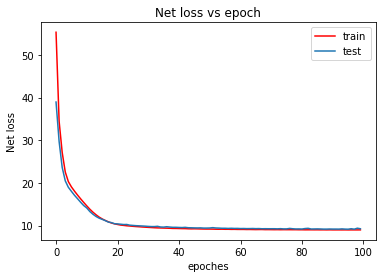

In [34]:
plt.plot(range(0,epochs),history.history['loss'],color='red',label='train')
plt.plot(range(0,epochs),history.history['val_loss'],label='test')
plt.title('Net loss vs epoch')
plt.xlabel('epoches')
plt.ylabel('Net loss')
plt.legend()
plt.show()

#### **Testing** 

In [35]:
h_pred = h.eval(m, [x1_test,x2_test,v_test,K_test])
print('MSE for h after training:',round(mean_squared_error(h_test,h_pred),10))

MSE for h after training: 9.2618450986


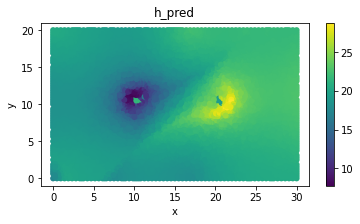

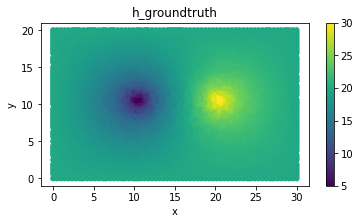

In [36]:
fig = plt.figure(figsize=(6, 3))
plt.scatter(x1_data_2, x2_data_2, c= h.eval(m, [x1_data_2,x2_data_2,v_data_2,K_data_2]), cmap='viridis',linewidths=.0001)
plt.xlabel('x')
plt.ylabel('y')
plt.title('h_pred')
plt.colorbar()
plt.show()

fig = plt.figure(figsize=(6, 3))
plt.scatter(x1_data_2, x2_data_2, c= h_data_2, cmap='viridis',linewidths=.0001)
plt.xlabel('x')
plt.ylabel('y')
plt.title('h_groundtruth')
plt.colorbar()
plt.show()

#### **Simulating**


In [37]:
v_data_df_unseen=pd.read_excel(base_dir+'Data/PitWithWell_DarcyFlux.xlsx')
h_data_df_unseen=pd.read_excel(base_dir+'Data/PitWithWell_HydraulicHead.xlsx')

In [38]:
x1_data_unseen=np.array(v_data_df_unseen['X'].values)
x2_data_unseen=np.array(v_data_df_unseen['Y'].values)

v_data_unseen=np.array(v_data_df_unseen['VINIT'].values)
print('v_data_unseen:',v_data_unseen.shape)

h_data_unseen=np.array(h_data_df_unseen['FINIT'].values)
print('h_data_unseen:',h_data_unseen.shape)

K_data_unseen=np.ones(x1_data_unseen.shape[0])*(86400*(1e-6))
print('K_data_unseen:',K_data_unseen.shape)

v_data_unseen: (7899,)
h_data_unseen: (7899,)
K_data_unseen: (7899,)


In [39]:
h_pred_unseen = h.eval(m, [x1_data_unseen,x2_data_unseen,h_data_unseen,K_data_unseen])
print('MSE for h on unseen data:',round(mean_squared_error(h_data_unseen,h_pred_unseen),10))

MSE for h on unseen data: 860.6534692954


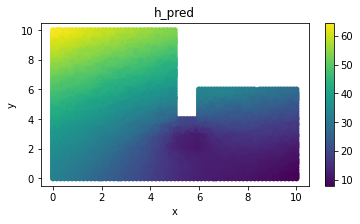

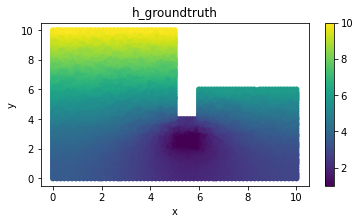

In [40]:
fig = plt.figure(figsize=(6, 3))
plt.scatter(x1_data_unseen, x2_data_unseen, c= h.eval(m, [x1_data_unseen,x2_data_unseen,h_data_unseen,K_data_unseen]), cmap='viridis',linewidths=.0001)
plt.xlabel('x')
plt.ylabel('y')
plt.title('h_pred')
plt.colorbar()
plt.show()

fig = plt.figure(figsize=(6, 3))
plt.scatter(x1_data_unseen, x2_data_unseen, c= h_data_unseen, cmap='viridis',linewidths=.0001)
plt.xlabel('x')
plt.ylabel('y')
plt.title('h_groundtruth')
plt.colorbar()
plt.show()